In [2]:
from mesa import Agent, Model
from mesa.space import MultiGrid
from mesa.time import RandomActivation
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
class Lobo(Agent):
    # Agentes que se comen a las ovejas.
    def __init__(self, unique_id, pos,e,prob_rep,model):
        # la clase agente guarda los ids y los enlaza con el modelo 
        super().__init__(unique_id,model)
        # lobos tienen energia, una posicion y una probabilidad de reproducirse
        self.energia = e 
        self.pos = pos
        self.prob_rep = prob_rep
    
    def move(self):
        # get_neighbourhood es utilidad de mesa pa devolver los vecinos
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=False,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
        
    def step(self):
        self.move()
         
        # comerse alguna oveja que este en su grilla 
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        sheep = [obj for obj in cellmates if isinstance(obj, Oveja)]
        if len(sheep)>0: 
            victima = self.random.choice(sheep)
            self.model.grid._remove_agent(self.pos, victima)
            self.model.schedule.remove(victima)
            self.energia += 10
            
        # tener hijos           
        if self.model.random.randint(1,10) < self.prob_rep:  #
            self.energia /= 2
            hijo = Lobo(self.model.next_id(),self.pos,self.energia,self.prob_rep,self.model)
            self.model.grid.place_agent(hijo, hijo.pos)
            self.model.schedule.add(hijo)
            
        #si no tengo energia, muero 
        self.energia -= 1
        if self.energia < 1: 
            self.model.grid._remove_agent(self.pos, self)
            self.model.schedule.remove(self)
            return
        


In [4]:
class Oveja(Agent):
    def __init__(self, unique_id,pos,prob_rep, model):
        super().__init__(unique_id, model)
        self.pos = pos
        self.prob_rep = prob_rep

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=False,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
        
    def step(self):
        self.move()
            
        if self.model.random.randint(1,10) < self.prob_rep:  #probabilidad de reproducirse 
            hija = Oveja(self.model.next_id(),self.pos,self.prob_rep,self.model)
            self.model.grid.place_agent(hija, hija.pos)
            self.model.schedule.add(hija)
            

In [5]:
class Lobooveja(Model):
    def __init__(self, N,M, width, height, p_rep_l,p_rep_o):
        self.num_lobos = N
        self.num_ovejas = M
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        self.current_id = 0
        # Create agents
        for i in range(self.num_lobos):
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            l = Lobo(self.next_id(),(x,y),15,p_rep_l,self) # 15 es la energía 
            self.schedule.add(l)
            # Add the agent to a random grid cell
            self.grid.place_agent(l, (x, y))
        # Create agents
        for i in range(self.num_ovejas):
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            o = Oveja(self.next_id(),(x,y),p_rep_o,self)
            self.schedule.add(o)
            # Add the agent to a random grid cell
            self.grid.place_agent(o, (x, y))      

    def step(self):
        self.schedule.step()
        

In [7]:
T = 200 #horizonte temporal
N = 30 # número de lobos
M = 10 # número de ovejas 

#tamaño de la grilla
width = 10  
heigh = 10 

ovejas = []
lobos = []

for j in range(4): #4 modelos distintos 
    ovejas.append([])
    lobos.append([])
    model = Lobooveja(N,M, 10, 10)
    for i in range(T):
        model.step()
        ovejas[j].append(0)
        lobos[j].append(0)
        for a in model.schedule.agents:
            if isinstance(a,Oveja): 
                ovejas[j][i]+=1
            else:
                lobos[j][i]+=1

TypeError: __init__() missing 2 required positional arguments: 'p_rep_l' and 'p_rep_o'

# Variar Prob de Rep de los Lobos

In [8]:
## VARIAR PROB DE REPRODUCCIÓN LOBOS

T = 200 #horizonte temporal
N = 30 # número de lobos
M = 10 # número de ovejas 

#tamaño de la grilla
width = 10  
heigh = 10 

ovejas1= []
lobos1 = []
nan_ovejas1 = []
nan_lobos1 = []

P = np.array(range(0,100,5))/10

for i in range(len(P)):
    print(i)
    p_rep = P[i]
    ovejas1.append([])
    lobos1.append([])
    for j in range(200):#30 modelos distintos 
        ovejas1[i].append([])
        lobos1[i].append([])
        model = Lobooveja(N,M, 10, 10,p_rep,3)
        for k in range(T):
            model.step()
            ovejas1[i][j].append(0)
            lobos1[i][j].append(0)
            for a in model.schedule.agents:
                if isinstance(a,Oveja): 
                    ovejas1[i][j][k]+=1
                else:
                    lobos1[i][j][k]+=1
                    
            if (ovejas1[i][j][k]>1000) or (lobos1[i][j][k]>1000):
                break
                
        if len(ovejas1[i][j])<200: #extiende listas que fueron cortadas
            ovejas1[i][j].extend(list(np.nan * np.array(range(200 - len(ovejas1[i][j])))))
           # print(i,j,len(ovejas1[i][j]))
                
        if len(lobos1[i][j])<200: #extiende listas que fueron cortadas
            lobos1[i][j].extend(list(np.nan * np.array(range(200 - len(lobos1[i][j])))))
                
#            print(i,j,k,ovejas[i][j][k],lobos[i][j][k])




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [19]:
#contador nan 

number_nan = []

for i in range(len(P)):
    number_nan.append([])
    for k in range(T):
        counter_ovejas = 0
        counter_lobos = 0
        for j in range(200):
            if np.isnan(ovejas1[i][j][k]):
                counter_ovejas += 1
                
        number_nan[i].append(counter_ovejas)  

In [20]:
lobos = []
ovejas = []

for i in range(len(P)):
    lobos.append([])
    ovejas.append([])
    
    lobos_i = np.array(lobos1[i])
    ovejas_i = np.array(ovejas1[i])
    
    av_lobos_i = np.nanmean(lobos_i,axis=0)
    lobos[i]=av_lobos_i
    
    av_ovejas_i = np.nanmean(ovejas_i,axis=0)
    ovejas[i]=av_ovejas_i



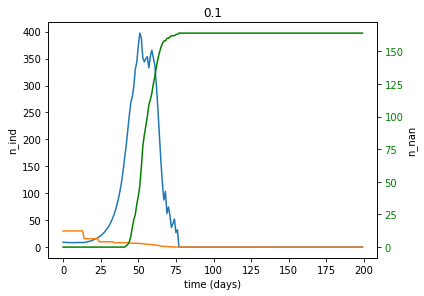

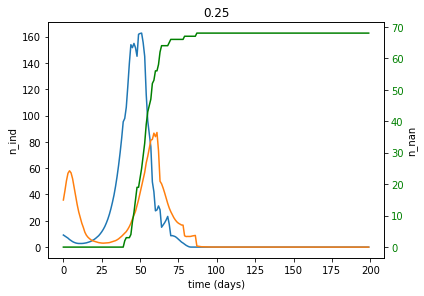

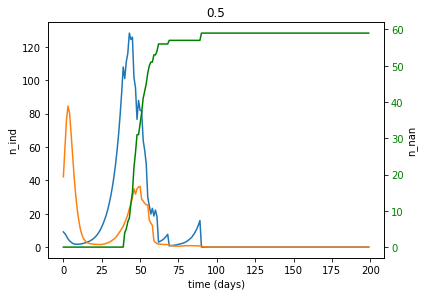

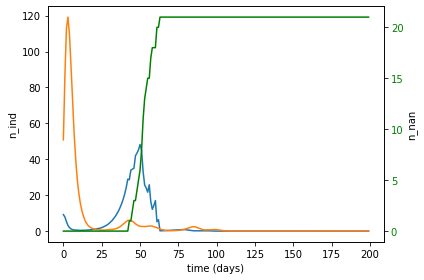

In [38]:
#GRÁFICOS

fig, ax1 = plt.subplots()

ax1.set_xlabel('time (days)')
ax1.set_ylabel('n_ind')
ax1.plot(ovejas[2], label = 'ovejas')
ax1.plot(lobos[2], label = 'lobos')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.set_xlabel('time (days)')
ax2.set_ylabel('n_nan')
ax2.plot(number_nan[2], color = 'g')
ax2.tick_params(axis='y', labelcolor = 'g')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('0.1')
plt.show()
plt.close()

#---------------------------------------------------------------------------------------------------------------

fig, ax1 = plt.subplots()

ax1.set_xlabel('time (days)')
ax1.set_ylabel('n_ind')
ax1.plot(ovejas[5], label = 'ovejas')
ax1.plot(lobos[5], label = 'lobos')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.set_xlabel('time (days)')
ax2.set_ylabel('n_nan')
ax2.plot(number_nan[5], color = 'g')
ax2.tick_params(axis='y', labelcolor = 'g')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('0.25')
plt.show()
plt.close()


#---------------------------------------------------------------------------------------------------------------


fig, ax1 = plt.subplots()

ax1.set_xlabel('time (days)')
ax1.set_ylabel('n_ind')
ax1.plot(ovejas[10], label = 'ovejas')
ax1.plot(lobos[10], label = 'lobos')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.set_xlabel('time (days)')
ax2.set_ylabel('n_nan')
ax2.plot(number_nan[10], color = 'g')
ax2.tick_params(axis='y', labelcolor = 'g')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('0.5')
plt.show()
plt.close()


#---------------------------------------------------------------------------------------------------------------


fig, ax1 = plt.subplots()

ax1.set_xlabel('time (days)')
ax1.set_ylabel('n_ind')
ax1.plot(ovejas[15], label = 'ovejas')
ax1.plot(lobos[15], label = 'lobos')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.set_xlabel('time (days)')
ax2.set_ylabel('n_nan')
ax2.plot(number_nan[15], color = 'g')
ax2.tick_params(axis='y', labelcolor = 'g')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('0.5')
plt.show()
plt.close()


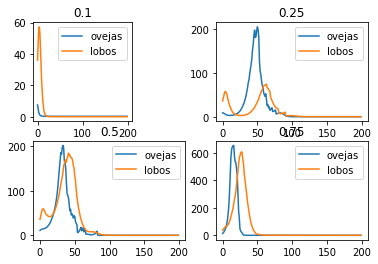

In [154]:
plt.subplot(2,3,1)
plt.plot(ovejas[2], label = "ovejas")
plt.plot(lobos[2], label = "lobos")
plt.title('0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(ovejas[5], label = "ovejas")
plt.plot(lobos[5], label = "lobos")
plt.title('0.25')
plt.legend()

plt.subplot(2,2,3)
plt.plot(ovejas[10], label = "ovejas")
plt.plot(lobos[10], label = "lobos")
plt.title('0.5')
plt.legend()

plt.subplot(2,2,4)
plt.plot(ovejas[15], label = "ovejas")
plt.plot(lobos[15], label = "lobos")
plt.title('0.75')
plt.legend()

# Variar Prob de Rep de las Ovejas

In [39]:
## VARIAR PROB DE REPRODUCCIÓN OVEJAS

T = 200 #horizonte temporal
N = 30 # número de lobos
M = 10 # número de ovejas 

#tamaño de la grilla
width = 10  
heigh = 10 

ovejas2= []
lobos2 = []

P = np.array(range(0,100,5))/10

for i in range(len(P)):
    print(i)
    p_rep = P[i]
    ovejas2.append([])
    lobos2.append([])
    for j in range(200):#30 modelos distintos 
        ovejas2[i].append([])
        lobos2[i].append([])
        model = Lobooveja(N,M, 10, 10,3,p_rep)
        for k in range(T):
            model.step()
            ovejas2[i][j].append(0)
            lobos2[i][j].append(0)
            for a in model.schedule.agents:
                if isinstance(a,Oveja): 
                    ovejas2[i][j][k]+=1
                else:
                    lobos2[i][j][k]+=1
                    
            if (ovejas2[i][j][k]>1000) or (lobos2[i][j][k]>1000):
                break
                
        if len(ovejas2[i][j])<200: #extiende listas que fueron cortadas
            ovejas2[i][j].extend(list(np.nan * np.array(range(200 - len(ovejas2[i][j])))))
           # print(i,j,len(ovejas1[i][j]))
                
        if len(lobos2[i][j])<200: #extiende listas que fueron cortadas
            lobos2[i][j].extend(list(np.nan * np.array(range(200 - len(lobos2[i][j])))))
                
#            print(i,j,k,ovejas[i][j][k],lobos[i][j][k])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [40]:
#contador nan 

number_nan = []

for i in range(len(P)):
    number_nan.append([])
    for k in range(T):
        counter_ovejas = 0
        counter_lobos = 0
        for j in range(200):
            if np.isnan(ovejas2[i][j][k]):
                counter_ovejas += 1
                
        number_nan[i].append(counter_ovejas)  

In [41]:
lobos = []
ovejas = []

for i in range(len(P)):
    lobos.append([])
    ovejas.append([])
    
    lobos_i = np.array(lobos2[i])
    ovejas_i = np.array(ovejas2[i])
    
    av_lobos_i = np.nanmean(lobos_i,axis=0)
    lobos[i]=av_lobos_i
    
    av_ovejas_i = np.nanmean(ovejas_i,axis=0)
    ovejas[i]=av_ovejas_i

/Users/danieltoro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/Users/danieltoro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


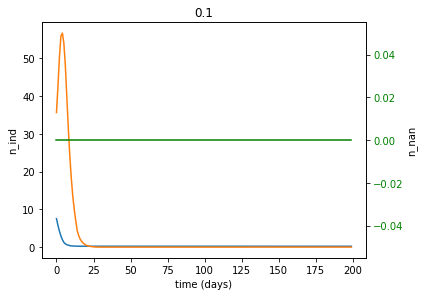

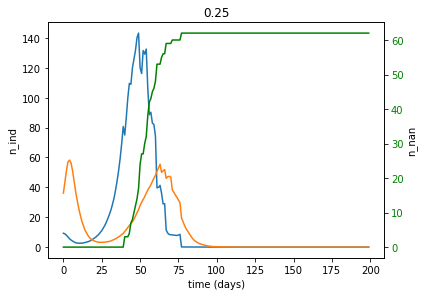

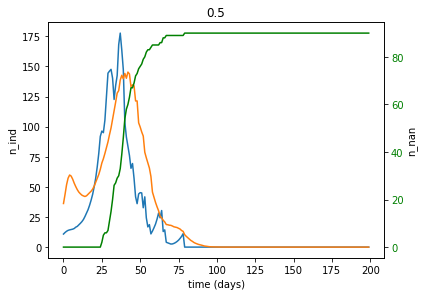

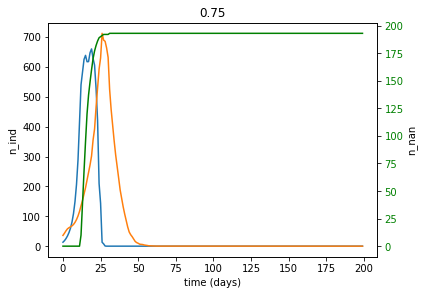

In [42]:
#GRÁFICOS

fig, ax1 = plt.subplots()

ax1.set_xlabel('time (days)')
ax1.set_ylabel('n_ind')
ax1.plot(ovejas[2], label = 'ovejas')
ax1.plot(lobos[2], label = 'lobos')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.set_xlabel('time (days)')
ax2.set_ylabel('n_nan')
ax2.plot(number_nan[2], color = 'g')
ax2.tick_params(axis='y', labelcolor = 'g')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('0.1')
plt.show()
plt.close()

#---------------------------------------------------------------------------------------------------------------

fig, ax1 = plt.subplots()

ax1.set_xlabel('time (days)')
ax1.set_ylabel('n_ind')
ax1.plot(ovejas[5], label = 'ovejas')
ax1.plot(lobos[5], label = 'lobos')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.set_xlabel('time (days)')
ax2.set_ylabel('n_nan')
ax2.plot(number_nan[5], color = 'g')
ax2.tick_params(axis='y', labelcolor = 'g')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('0.25')
plt.show()
plt.close()


#---------------------------------------------------------------------------------------------------------------


fig, ax1 = plt.subplots()

ax1.set_xlabel('time (days)')
ax1.set_ylabel('n_ind')
ax1.plot(ovejas[10], label = 'ovejas')
ax1.plot(lobos[10], label = 'lobos')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.set_xlabel('time (days)')
ax2.set_ylabel('n_nan')
ax2.plot(number_nan[10], color = 'g')
ax2.tick_params(axis='y', labelcolor = 'g')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('0.5')
plt.show()
plt.close()


#---------------------------------------------------------------------------------------------------------------


fig, ax1 = plt.subplots()

ax1.set_xlabel('time (days)')
ax1.set_ylabel('n_ind')
ax1.plot(ovejas[15], label = 'ovejas')
ax1.plot(lobos[15], label = 'lobos')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.set_xlabel('time (days)')
ax2.set_ylabel('n_nan')
ax2.plot(number_nan[15], color = 'g')
ax2.tick_params(axis='y', labelcolor = 'g')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('0.75')
plt.show()
plt.close()


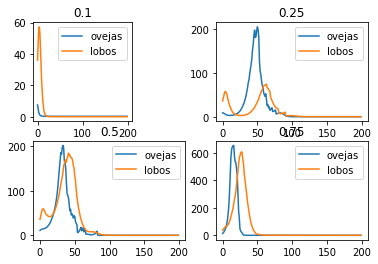

In [155]:
plt.subplot(2,3,1)
plt.plot(ovejas[2], label = "ovejas")
plt.plot(lobos[2], label = "lobos")
plt.title('0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(ovejas[5], label = "ovejas")
plt.plot(lobos[5], label = "lobos")
plt.title('0.25')
plt.legend()

plt.subplot(2,2,3)
plt.plot(ovejas[10], label = "ovejas")
plt.plot(lobos[10], label = "lobos")
plt.title('0.5')
plt.legend()

plt.subplot(2,2,4)
plt.plot(ovejas[15], label = "ovejas")
plt.plot(lobos[15], label = "lobos")
plt.title('0.75')
plt.legend()

# Variando la proporción inicial entre lobos y ovejas

In [43]:
## VARIAR PROPORCIONES

T = 200 #horizonte temporal
N = np.array(range(1,41)) # número de lobos
M = np.sort(np.array(range(1,41)))[::-1] # número de ovejas 


#tamaño de la grilla
width = 10  
heigh = 10 

ovejas3 = []
lobos3 = []

for i in range(len(N)):
    print(i)
    ovejas3.append([])
    lobos3.append([])
    for j in range(200):#30 modelos distintos 
        ovejas3[i].append([])
        lobos3[i].append([])
        model = Lobooveja(N[i],M[i], 10, 10,2,3)
        for k in range(T):
            model.step()
            ovejas3[i][j].append(0)
            lobos3[i][j].append(0)
            for a in model.schedule.agents:
                if isinstance(a,Oveja): 
                    ovejas3[i][j][k]+=1
                else:
                    lobos3[i][j][k]+=1
                    
            if (ovejas3[i][j][k]>1000) or (lobos3[i][j][k]>1000):
                break
                
        if len(ovejas3[i][j])<200: #extiende listas que fueron cortadas
            ovejas3[i][j].extend(list(np.nan * np.array(range(200 - len(ovejas3[i][j])))))
           # print(i,j,len(ovejas1[i][j]))
                
        if len(lobos3[i][j])<200: #extiende listas que fueron cortadas
            lobos3[i][j].extend(list(np.nan * np.array(range(200 - len(lobos3[i][j])))))
                
#            print(i,j,k,ovejas[i][j][k],lobos[i][j][k])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [47]:
#contador nan 

number_nan = []

for i in range(len(N)):
    number_nan.append([])
    for k in range(T):
        counter_ovejas = 0
        counter_lobos = 0
        for j in range(200):
            if np.isnan(ovejas3[i][j][k]):
                counter_ovejas += 1
                
        number_nan[i].append(counter_ovejas)  

In [48]:
lobos = []
ovejas = []

for i in range(len(N)):
    lobos.append([])
    ovejas.append([])
    
    lobos_i = np.array(lobos3[i])
    ovejas_i = np.array(ovejas3[i])
    
    av_lobos_i = np.nanmean(lobos_i,axis=0)
    lobos[i]=av_lobos_i
    
    av_ovejas_i = np.nanmean(ovejas_i,axis=0)
    ovejas[i]=av_ovejas_i

/Users/danieltoro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/Users/danieltoro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


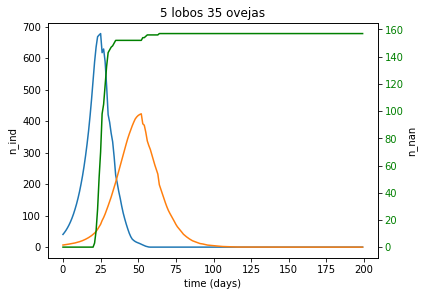

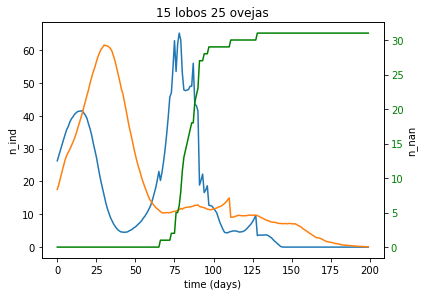

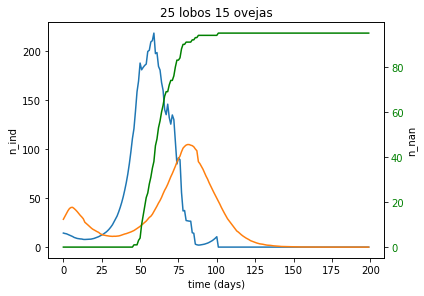

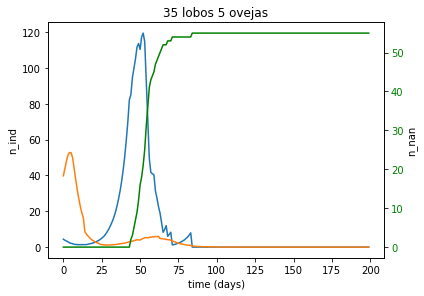

In [49]:
#GRÁFICOS

fig, ax1 = plt.subplots()

ax1.set_xlabel('time (days)')
ax1.set_ylabel('n_ind')
ax1.plot(ovejas[5], label = 'ovejas')
ax1.plot(lobos[5], label = 'lobos')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.set_xlabel('time (days)')
ax2.set_ylabel('n_nan')
ax2.plot(number_nan[5], color = 'g')
ax2.tick_params(axis='y', labelcolor = 'g')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('5 lobos 35 ovejas')
plt.show()
plt.close()

#---------------------------------------------------------------------------------------------------------------

fig, ax1 = plt.subplots()

ax1.set_xlabel('time (days)')
ax1.set_ylabel('n_ind')
ax1.plot(ovejas[15], label = 'ovejas')
ax1.plot(lobos[15], label = 'lobos')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.set_xlabel('time (days)')
ax2.set_ylabel('n_nan')
ax2.plot(number_nan[15], color = 'g')
ax2.tick_params(axis='y', labelcolor = 'g')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('15 lobos 25 ovejas')
plt.show()
plt.close()


#---------------------------------------------------------------------------------------------------------------


fig, ax1 = plt.subplots()

ax1.set_xlabel('time (days)')
ax1.set_ylabel('n_ind')
ax1.plot(ovejas[25], label = 'ovejas')
ax1.plot(lobos[25], label = 'lobos')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.set_xlabel('time (days)')
ax2.set_ylabel('n_nan')
ax2.plot(number_nan[25], color = 'g')
ax2.tick_params(axis='y', labelcolor = 'g')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('25 lobos 15 ovejas')
plt.show()
plt.close()


#---------------------------------------------------------------------------------------------------------------


fig, ax1 = plt.subplots()

ax1.set_xlabel('time (days)')
ax1.set_ylabel('n_ind')
ax1.plot(ovejas[35], label = 'ovejas')
ax1.plot(lobos[35], label = 'lobos')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.set_xlabel('time (days)')
ax2.set_ylabel('n_nan')
ax2.plot(number_nan[35], color = 'g')
ax2.tick_params(axis='y', labelcolor = 'g')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('35 lobos 5 ovejas')
plt.show()
plt.close()


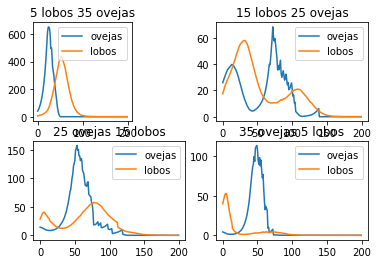

In [174]:
plt.subplot(2,3,1)
plt.plot(ovejas[5], label = "ovejas")
plt.plot(lobos[5], label = "lobos")
plt.title('5 lobos 35 ovejas')
plt.legend()

plt.subplot(2,2,2)
plt.plot(ovejas[15], label = "ovejas")
plt.plot(lobos[15], label = "lobos")
plt.title('15 lobos 25 ovejas')
plt.legend()

plt.subplot(2,2,3)
plt.plot(ovejas[25], label = "ovejas")
plt.plot(lobos[25], label = "lobos")
plt.title('25 ovejas 15 lobos')
plt.legend()

plt.subplot(2,2,4)
plt.plot(ovejas[35], label = "ovejas")
plt.plot(lobos[35], label = "lobos")
plt.title('35 ovejas 5 lobos')
plt.legend()

In [1]:
print(len(range(1)))

1
